In [1]:
from sklearn.datasets import make_multilabel_classification
import bls3
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from skmultilearn.dataset import load_dataset,load_from_arff
from skmultilearn.dataset import available_data_sets
from sklearn.metrics import accuracy_score,hamming_loss,f1_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import seed
from random import randrange,random
from csv import reader
import bagging1
from sklearn.ensemble import RandomForestClassifier
from skmultilearn.adapt import MLkNN,MLTSVM,MLARAM
import timeit
import copy

D:\anaconda3\envs\openne\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
set([x[0] for x in available_data_sets().keys()])

{'Corel5k',
 'bibtex',
 'birds',
 'delicious',
 'emotions',
 'enron',
 'genbase',
 'mediamill',
 'medical',
 'rcv1subset1',
 'rcv1subset2',
 'rcv1subset3',
 'rcv1subset4',
 'rcv1subset5',
 'scene',
 'tmc2007_500',
 'yeast'}

In [3]:
X_train, y_train, feature_names, label_names = load_dataset('scene', 'train')
X_test, y_test, _, _ = load_dataset('scene', 'test')
X=np.vstack([X_train.toarray(),X_test.toarray()])
y=np.vstack([y_train.toarray(),y_test.toarray()])

scene:train - exists, not redownloading
scene:test - exists, not redownloading


In [4]:
bls = bls3.broadnet(maptimes = 10,
               enhencetimes = 10,
               map_function = 'sigmoid',
               enhence_function = 'sigmoid',
               batchsize = 'auto',
               reg = 0.001)

In [5]:
bagging_net=bagging1.bagging_net(10,bls,False)

In [6]:
kNN = MLkNN()
ARAM=MLARAM()
RFC=RandomForestClassifier()
dtc=DecisionTreeClassifier()

In [7]:
model=[dtc,RFC,bls,bagging_net,kNN,ARAM]

In [8]:
#num用于控制循环的次数
num=20
accuracy_total=[[]for i in range(len(model))]
hamming_total=[[]for i in range(len(model))]
f1_micro_total=[[]for i in range(len(model))]
f1_macro_total=[[]for i in range(len(model))]
time_total=[[]for i in range(len(model))]

In [9]:
for j in range(num):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
    for i in range(len(model)):
        start = timeit.default_timer()
        classifier=copy.deepcopy(model[i])
        classifier.fit(X_train,y_train)
        end = timeit.default_timer()
        prediction=classifier.predict(X_test)
        accuracy_total[i].append(accuracy_score(y_pred=prediction,y_true=y_test))
        hamming_total[i].append(hamming_loss(y_pred=prediction,y_true=y_test))
        f1_micro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='micro'))
        f1_macro_total[i].append(f1_score(y_pred=prediction,y_true=y_test,average='macro'))
        time_total[i].append(end-start)

number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97967 minvalue 0.01756 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97574 minvalue 0.01869 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97287 minvalue 0.03676 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97238 minvalue 0.02214 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98076 minvalue 0.02844 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97226 minvalue 0.03574 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhenc

number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98963 minvalue 0.01131 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97905 minvalue 0.02755 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96414 minvalue 0.03158 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98149 minvalue 0.01606 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98208 minvalue 0.01521 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9774 minvalue 0.02239 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98168 minvalue 0.02331 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.96789 minvalue 0.03056 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98195 minvalue 0.02756 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97434 minvalue 0.02332 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97908 minvalue 0.02562 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98223 minvalue 0.0233 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence

number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.97597 minvalue 0.02322 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9815 minvalue 0.03814 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.9897 minvalue 0.01436 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98048 minvalue 0.02056 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98723 minvalue 0.02276 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence nodes maxvalue 0.98273 minvalue 0.02757 
number of mapping nodes 2940, number of enhence nodes 2940
mapping nodes maxvalue 1.0 minvalue 0.0 
enhence 

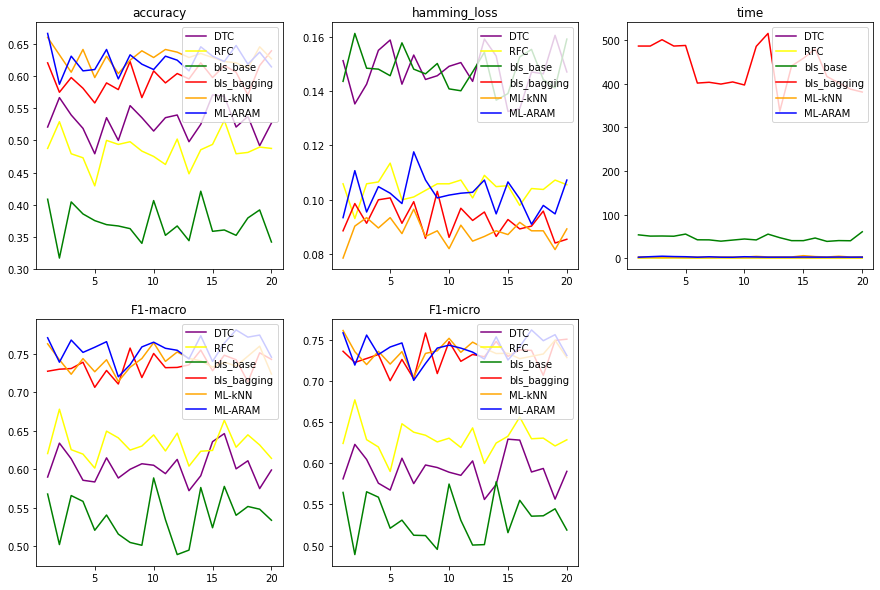

In [10]:
plt.figure(1,figsize=(15,10))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.plot(range(1,num+1),accuracy_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),accuracy_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),accuracy_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),accuracy_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),accuracy_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),accuracy_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.plot(range(1,num+1),hamming_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),hamming_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),hamming_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),hamming_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),hamming_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),hamming_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,3)
plt.title("time")
plt.plot(range(1,num+1),time_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),time_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),time_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),time_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),time_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),time_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.plot(range(1,num+1),f1_macro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_macro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_macro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_macro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_macro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_macro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.plot(range(1,num+1),f1_micro_total[0],color='purple',label='DTC')
plt.plot(range(1,num+1),f1_micro_total[1],color='yellow',label='RFC')
plt.plot(range(1,num+1),f1_micro_total[2],color='green',label='bls_base')
plt.plot(range(1,num+1),f1_micro_total[3],color='red',label='bls_bagging')
plt.plot(range(1,num+1),f1_micro_total[4],color='orange',label='ML-kNN')
plt.plot(range(1,num+1),f1_micro_total[5],color='blue',label='ML-ARAM')
plt.legend(loc='upper right')
plt.show()

In [11]:
score=[[]for i in range(5)]
for i in range(len(model)):
    print('the accuracy score of model{0}'.format(i+1),np.mean(accuracy_total[i]))
    score[0].append(np.mean(accuracy_total[i]))
    print('the hamming loss of model{0}'.format(i+1),np.mean(hamming_total[i]))
    score[1].append(np.mean(hamming_total[i]))
    print('the time of model{0}'.format(i+1),np.mean(time_total[i]))
    score[2].append(np.mean(time_total[i]))
    print('the F1 macro score of model{0}'.format(i+1),np.mean(f1_macro_total[i]))
    score[3].append(np.mean(f1_macro_total[i]))
    print('the F1 micro score of model{0}'.format(i+1),np.mean(f1_micro_total[i]))
    score[4].append(np.mean(f1_micro_total[i]))
    print('\n')

the accuracy score of model1 0.5288381742738589
the hamming loss of model1 0.14745850622406637
the time of model1 0.7482287299998417
the F1 macro score of model1 0.6030166481710826
the F1 micro score of model1 0.5910119845602624


the accuracy score of model2 0.48547717842323646
the hamming loss of model2 0.1042704011065007
the time of model2 0.267128430000097
the F1 macro score of model2 0.6320197972050818
the F1 micro score of model2 0.6300421542525843


the accuracy score of model3 0.3705394190871369
the hamming loss of model3 0.1479080221300138
the time of model3 45.944413114999946
the F1 macro score of model3 0.5366926687422809
the F1 micro score of model3 0.5320101348303662


the accuracy score of model4 0.5975103734439833
the hamming loss of model4 0.09263485477178422
the time of model4 438.291305735
the F1 macro score of model4 0.7341781220171114
the F1 micro score of model4 0.7303580147006532


the accuracy score of model5 0.6280082987551866
the hamming loss of model5 0.088139

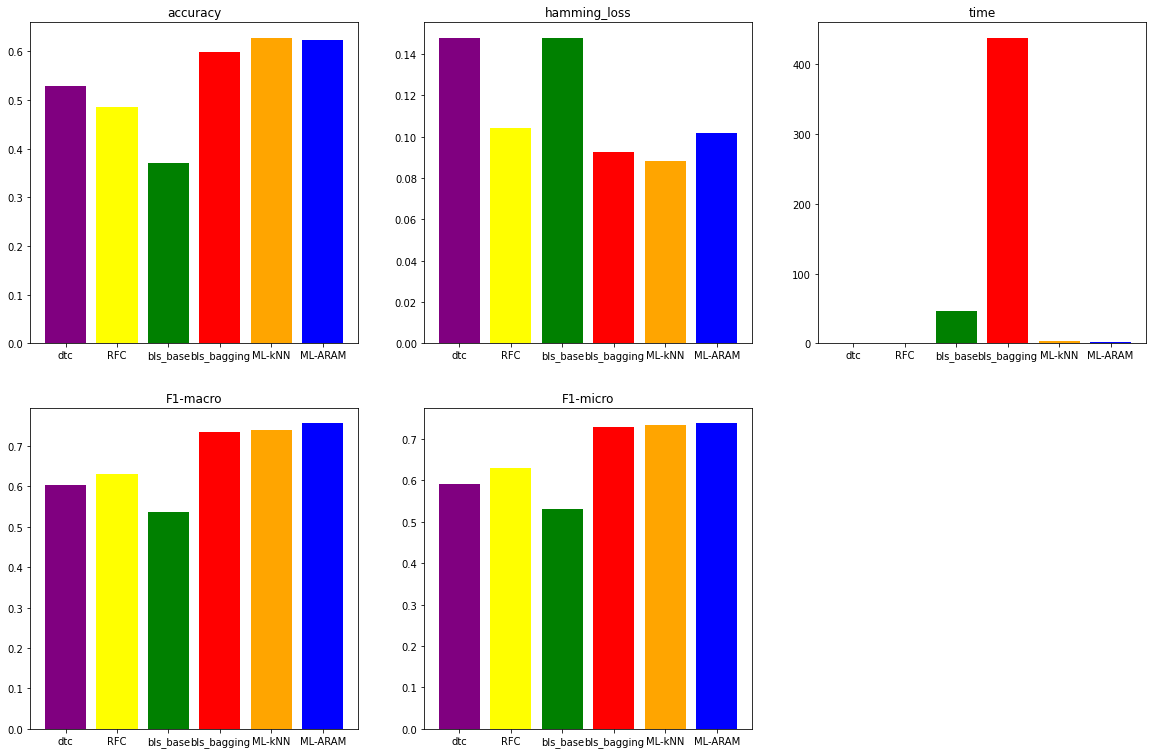

In [13]:
model_name=['dtc','RFC','bls_base','bls_bagging','ML-kNN','ML-ARAM']
plt.figure(1,figsize=(20,13))
plt.subplot(2,3,1)
plt.title("accuracy")
plt.bar(model_name,score[0],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,2)
plt.title("hamming_loss")
plt.bar(model_name,score[1],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,3)
plt.title("time")
plt.bar(model_name,score[2],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,4)
plt.title("F1-macro")
plt.bar(model_name,score[3],color=['purple','yellow','green','red','orange','blue'])
plt.subplot(2,3,5)
plt.title("F1-micro")
plt.bar(model_name,score[4],color=['purple','yellow','green','red','orange','blue'])
plt.show()